In [1]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv('https://raw.githubusercontent.com/dumoltj/Portfolioproject/main/movies.csv', index_col=0,parse_dates=[0])

In [2]:
# lets look at the data

In [3]:
df.head()

,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,,,,,,,,,,,,,,
The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
# Look for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{}-{}%'.format(col,pct_missing))

rating-0.010041731872717789%
genre-0.0%
year-0.0%
released-0.0002608242044861763%
score-0.0003912363067292645%
votes-0.0003912363067292645%
director-0.0%
writer-0.0003912363067292645%
star-0.00013041210224308815%
country-0.0003912363067292645%
budget-0.2831246739697444%
gross-0.02464788732394366%
company-0.002217005738132499%
runtime-0.0005216484089723526%


In [5]:
# Data types for our columns
df.dtypes

rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
# drop missing values 
df = df.dropna()

In [7]:
# changing type to make columns look better 
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')


In [8]:
NewDataFrame = df["released"].str.split(" ",n=3,expand = True) 
NewDataFrame.rename(columns={0: "Month", 1: "day",2:"Year",3:"Country"}, inplace=True)
df['yearcorrect'] = NewDataFrame['Year']

In [9]:
df.head()

,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,,,,,,,,,,,,,,,
The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980


In [10]:

df.sort_values(by=['gross'], inplace=False, ascending=False)

,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,,,,,,,,,,,,,,,
Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96,2015
Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97,1994
Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108,2001


In [11]:
#See all rows in the dataframe

pd.set_option('display.max_rows', None)

In [12]:
# Drop and duplicates
df['company'].drop_duplicates().sort_values(ascending=False)

name
47 Meters Down                                                                                                                   thefyzz
Incendies                                                                                                                    micro_scope
The Deep End                                                                                                                    i5 Films
Dope                                                                                                                          i am OTHER
Upstream Color                                                                                                                      erbp
Hamlet                                                                                                                    double A Films
BASEketball                                                                                                  Zucker Brothers Productions
One from the Heart                  

In [13]:
df.head()

,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,,,,,,,,,,,,,,,
The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980


In [14]:
# Budget high correlation
# Company high correlation

<function matplotlib.pyplot.show(*args, **kw)>

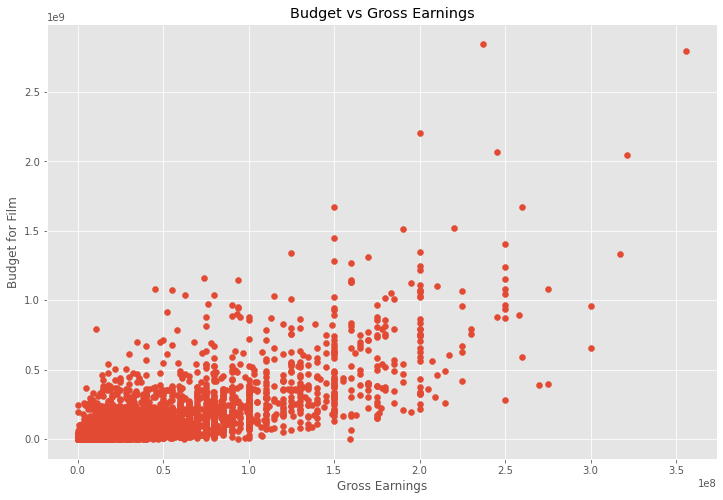

In [15]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
matplotlib.pyplot.xlabel('Gross Earnings')
matplotlib.pyplot.ylabel('Budget for Film')
plt.show

In [16]:
df.head()

,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,,,,,,,,,,,,,,,
The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980


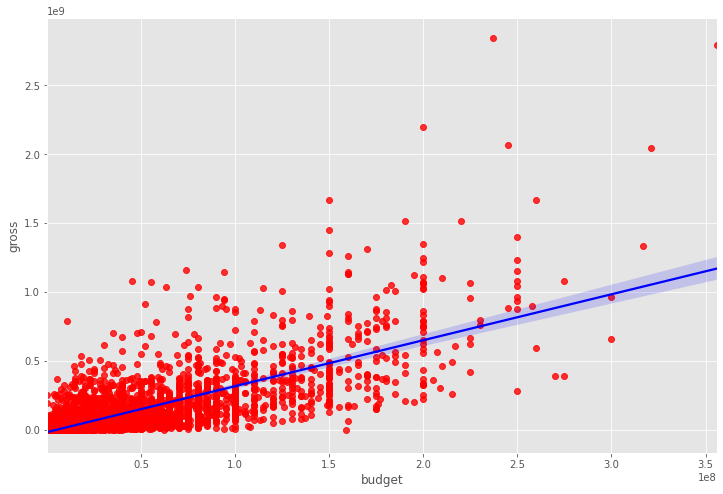

In [17]:
# Plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data =df, scatter_kws={"color":'red'}, line_kws={"color": "blue"})

In [18]:
# let's start looking at cottelation

In [19]:
df.corr() #pearson, kendall, spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


In [20]:
# High correlation between budget and gorss

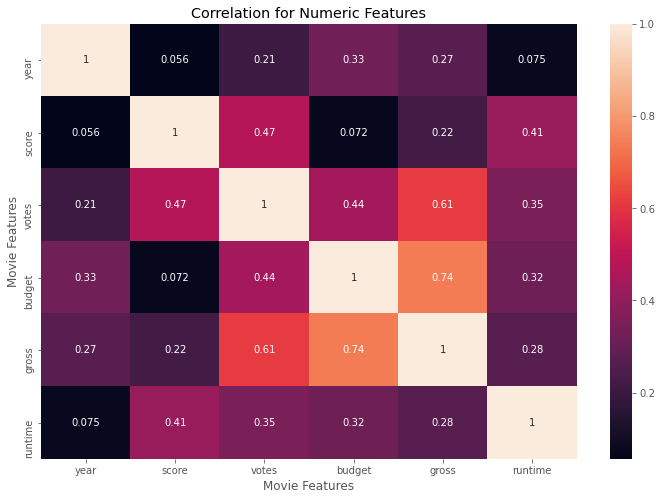

In [21]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation for Numeric Features')

matplotlib.pyplot.xlabel('Movie Features')

matplotlib.pyplot.ylabel('Movie Features')

plt.show()

In [22]:
# Look at Company

In [42]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized.head()

,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,,,,,,,,,,,,,,,
The Shining,6,6,1980,1304,8.4,927000,1795,2832,699,46,19000000,46998772,1426,146,2
The Blue Lagoon,6,1,1980,1127,5.8,65000,1578,1158,214,47,4500000,58853106,452,104,2
Star Wars: Episode V - The Empire Strikes Back,4,0,1980,1359,8.7,1200000,757,1818,1157,47,18000000,538375067,945,124,2
Airplane!,4,4,1980,1127,7.7,221000,889,1413,1474,47,3500000,83453539,1108,88,2
Caddyshack,6,4,1980,1170,7.3,108000,719,351,271,47,6000000,39846344,1083,98,2


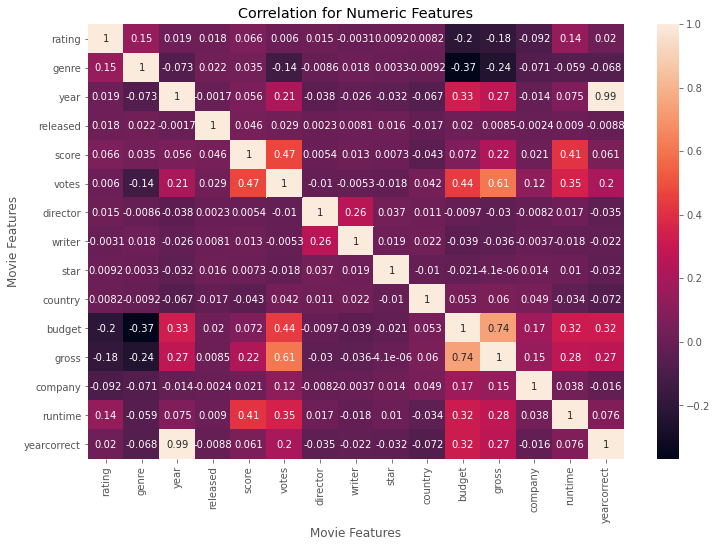

In [25]:
correlation_matrix = df_numerized.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation for Numeric Features')

matplotlib.pyplot.xlabel('Movie Features')

matplotlib.pyplot.ylabel('Movie Features')

plt.show()

In [26]:
df_numerized.corr()

,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
rating,1.000000,0.147796,0.019499,0.018083,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792,0.019749
genre,0.147796,1.000000,-0.073167,0.022142,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237,-0.067962
year,0.019499,-0.073167,1.000000,-0.001740,0.056386,0.206021,-0.038354,-0.025908,-0.032157,-0.066748,0.327722,0.274321,-0.014333,0.075077,0.994821
released,0.018083,0.022142,-0.001740,1.000000,0.045874,0.028833,0.002308,0.008072,0.015706,-0.017228,0.019952,0.008501,-0.002407,0.008975,-0.008821
score,0.065983,0.035106,0.056386,0.045874,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.072001,0.222556,0.020656,0.414068,0.061059
votes,0.006031,-0.135990,0.206021,0.028833,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.439675,0.614751,0.118470,0.352303,0.202953
director,0.014656,-0.008553,-0.038354,0.002308,0.005413,-0.010376,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.029560,-0.008223,0.017433,-0.035162
writer,-0.003149,0.017578,-0.025908,0.008072,0.012843,-0.005316,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.035885,-0.003697,-0.017561,-0.022050
star,0.009196,0.003341,-0.032157,0.015706,0.007296,-0.017638,0.036593,0.018520,1.000000,-0.009990,-0.021473,-0.000004,0.014082,0.010108,-0.031631
country,0.008230,-0.009164,-0.066748,-0.017228,-0.043051,0.041551,0.011133,0.022488,-0.009990,1.000000,0.052977,0.060078,0.048569,-0.034477,-0.071611


In [27]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

rating       rating         1.000000
             genre          0.147796
             year           0.019499
             released       0.018083
             score          0.065983
             votes          0.006031
             director       0.014656
             writer        -0.003149
             star           0.009196
             country        0.008230
             budget        -0.203946
             gross         -0.181906
             company       -0.092357
             runtime        0.140792
             yearcorrect    0.019749
genre        rating         0.147796
             genre          1.000000
             year          -0.073167
             released       0.022142
             score          0.035106
             votes         -0.135990
             director      -0.008553
             writer         0.017578
             star           0.003341
             country       -0.009164
             budget        -0.368523
             gross         -0.244101
 

In [29]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre        budget        -0.368523
budget       genre         -0.368523
genre        gross         -0.244101
gross        genre         -0.244101
rating       budget        -0.203946
budget       rating        -0.203946
rating       gross         -0.181906
gross        rating        -0.181906
votes        genre         -0.135990
genre        votes         -0.135990
rating       company       -0.092357
company      rating        -0.092357
year         genre         -0.073167
genre        year          -0.073167
yearcorrect  country       -0.071611
country      yearcorrect   -0.071611
company      genre         -0.071334
genre        company       -0.071334
             yearcorrect   -0.067962
yearcorrect  genre         -0.067962
year         country       -0.066748
country      year          -0.066748
runtime      genre         -0.059237
genre        runtime       -0.059237
score        country       -0.043051
country      score         -0.043051
budget       writer        -0.039466
w

In [41]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

votes        gross          0.614751
gross        votes          0.614751
             budget         0.740247
budget       gross          0.740247
yearcorrect  year           0.994821
year         yearcorrect    0.994821
rating       rating         1.000000
writer       writer         1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
# votes and budget have highest correlation to gorss earnings
# Company has low correlation.  